In [1]:
import numpy as np
import pandas as pd

In [2]:
from tabula import read_pdf

In [3]:
import warnings
warnings.simplefilter('ignore')

---

## Infected map

https://systems.jhu.edu/research/public-health/ncov/ inspired by this dashboard (warning: in the US only city-level counts are mapped, not unassigned locations)

### Get and clean counts data

In [4]:
pdf_path = '/Users/stefan/Downloads/20200228-sitrep-39-covid-19.pdf'

source: [WHO](https://www.who.int/emergencies/diseases/novel-coronavirus-2019/situation-reports)

note: numbers are not precise, especially in Chine, which changed the definition of a "confirmed" case several times https://www.nytimes.com/interactive/2020/world/coronavirus-maps.html

#### China: province level (from pdf)

In [5]:
%%time
china_provinces = read_pdf(pdf_path, pages=3)[0]
china_provinces

CPU times: user 4.42 ms, sys: 5.95 ms, total: 10.4 ms
Wall time: 2.71 s


Cumulative Province/  Daily           Unnamed: 0
0                     Population                  NaN
1                        Region/                  NaN
2                      (10,000s)                  NaN
3            Confirmed Suspected            Confirmed
4               City cases cases  Deaths cases Deaths
5                            NaN                  NaN
6             Hubei 5917 318 332        41 65914 2682
7            Guangdong 11346 1 2             0 1348 7
8                 Henan 9605 0 1            0 1272 20
9              Zhejiang 5737 0 0             0 1205 1
10                Hunan 6899 0 0             0 1017 4
11                Anhui 6324 1 0              0 990 6
12              Jiangxi 4648 1 0              0 935 1
13            Shandong 10047 0 0              0 756 6
14              Jiangsu 8051 0 0              0 631 0
15            Chongqing 3102 0 6              0 576 6
16              Sichuan 8341 4 4              0 538 3
17         Heilongjiang 3773 0 0             0 480 13
18             Beijing 2154 0 12              2 410 7
19            Shanghai 2424 0 36              0 337 3
20                Hebei 7556 1 0              0 318 6
21               Fujian 3941 0 0              0 296 1
22              Guangxi 4926 0 0              0 252 2
23              Shaanxi 3864 0 0              0 245 1
24               Yunnan 4830 0 4              0 174 2
25                Hainan 934 0 5              0 168 5
26              Guizhou 3600 0 1              0 146 2
27             Tianjin 1560 1 24              0 136 3
28               Shanxi 3718 0 0              0 133 0
29            Liaoning 4359 0 22              0 121 1
30                Jilin 2704 0 3               0 93 1
31         Hong Kong SAR 745 2 0               0 93 2
32                Gansu 2637 0 0               0 91 2
33             Xinjiang 2487 0 0               1 76 3
34       Inner Mongolia 2534 0 0               0 75 0
35               Ningxia 688 0 0               0 72 0
36  Taipei and environs 2359 2 0               0 34 1
37               Qinghai 603 0 0               0 18 0
38              Macao SAR 66 0 0               0 10 0
39                Xizang 344 0 0                0 1 0
40          Total 142823 331 452        44 78961 2791

has issues with nested column headers

In [6]:
china_provinces = china_provinces.iloc[6:-1]  # first 6 are extraction artefacts, last one is the total
china_provinces = pd.DataFrame({
    'region': china_provinces.iloc[:, 0].str.split().str[0].astype(str),
    'cases' : china_provinces.iloc[:, 1].str.split().str[1].astype(int),
    'deaths': china_provinces.iloc[:, 1].str.split().str[2].astype(int),
}).reset_index(drop=True)

In [7]:
china_provinces.region[0] = 'Wuhan, Hubei'

In [8]:
china_provinces

region  cases  deaths
0   Wuhan, Hubei  65914    2682
1      Guangdong   1348       7
2          Henan   1272      20
3       Zhejiang   1205       1
4          Hunan   1017       4
5          Anhui    990       6
6        Jiangxi    935       1
7       Shandong    756       6
8        Jiangsu    631       0
9      Chongqing    576       6
10       Sichuan    538       3
11  Heilongjiang    480      13
12       Beijing    410       7
13      Shanghai    337       3
14         Hebei    318       6
15        Fujian    296       1
16       Guangxi    252       2
17       Shaanxi    245       1
18        Yunnan    174       2
19        Hainan    168       5
20       Guizhou    146       2
21       Tianjin    136       3
22        Shanxi    133       0
23      Liaoning    121       1
24         Jilin     93       1
25          Hong     93       2
26         Gansu     91       2
27      Xinjiang     76       3
28         Inner     75       0
29       Ningxia     72       0
30        Taipei     34       1
31       Qinghai     18       0
32         Macao     10       0
33        Xizang      1       0

#### World: country level (from pdf)

In [9]:
%%time
world_countries = pd.concat(read_pdf(pdf_path, pages=[4,5], pandas_options={'header': None}))
world_countries

Got stderr: Feb 29, 2020 5:56:53 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font BCDHEE+Calibri-Bold are not implemented in PDFBox and will be ignored
Feb 29, 2020 5:56:53 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font BCDHEE+Calibri-Bold are not implemented in PDFBox and will be ignored
Feb 29, 2020 5:56:54 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font BCDHEE+Calibri-Bold are not implemented in PDFBox and will be ignored
Feb 29, 2020 5:56:54 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font BCDGEE+Calibri are not implemented in PDFBox and will be ignored
Feb 29, 2020 5:56:54 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font BCDGEE+Calibri are not implemented in PDFBox and will be ignored
Feb 29, 2020 5:56:54 PM org.apache.pdfbox.pdmodel.fon

CPU times: user 10.5 ms, sys: 6.69 ms, total: 17.2 ms
Wall time: 3.54 s


0                 1             2  \
0                        NaN  Total confirmed*  Total deaths   
1                    Country               NaN           NaN   
2                        NaN       cases (new)         (new)   
3     Western Pacific Region               NaN           NaN   
4          Republic of Korea        2337 (571)        13 (0)   
..                       ...               ...           ...   
8   Subtotal for all regions       3986 (1027)       63 (10)   
9   International conveyance               NaN           NaN   
10                       NaN           705 (0)         4 (0)   
11      (Diamond Princess) ‡               NaN           NaN   
12              Grand total§       4691 (1027)       67 (10)   

                     3                4  
0         Transmission  Days since last  
1                  NaN              NaN  
2      classification†    reported case  
3                  NaN              NaN  
4   Local transmission                0  
..                 ...              ...  
8                  NaN              NaN  
9                  NaN                2  
10  Local transmission              NaN  
11                 NaN              NaN  
12                 NaN              NaN  

[65 rows x 5 columns]

In [10]:
world_countries = world_countries.iloc[3:-5, :3].dropna().reset_index(drop=True)
world_countries.columns = ['region', 'cases', 'deaths']

In [11]:
world_countries.cases  = world_countries.cases .str.split().str[0].astype(int)
world_countries.deaths = world_countries.deaths.str.split().str[0].astype(int)

In [12]:
# manually enter Diamond Princess data (from territorial Japanese waters)
world_countries.loc[len(world_countries)] = ('Sea of Japan', 705, 4)

In [13]:
# USA will have data populated at city level
world_countries = world_countries[world_countries.region != 'United States of America']

In [14]:
# manually localize italian spread
world_countries.region[world_countries.region == 'Italy'] = 'Milan, Italy'

In [15]:
world_countries

region  cases  deaths
0            Republic of Korea   2337      13
1                        Japan    210       4
2                    Singapore     96       0
3                     Malaysia     24       0
4                    Australia     23       0
5                     Viet Nam     16       0
6                  Philippines      3       1
7                     Cambodia      1       0
8                  New Zealand      1       0
9                 Milan, Italy    650      17
10                      France     38       2
11                     Germany     26       0
12                       Spain     25       0
13          The United Kingdom     16       0
14                      Sweden      7       0
15                 Switzerland      6       0
16                     Austria      4       0
17                      Norway      4       0
18                      Greece      3       0
19                      Israel      3       0
20                     Croatia      3       0
21                     Finland      2       0
22          Russian Federation      2       0
23                     Belarus      1       0
24                   Lithuania      1       0
25                 Netherlands      1       0
26             North Macedonia      1       0
27                     Romania      1       0
28                     Belgium      1       0
29                     Denmark      1       0
30                     Estonia      1       0
31                     Georgia      1       0
32                    Thailand     40       0
33                       India      3       0
34                       Nepal      1       0
35                   Sri Lanka      1       0
36  Iran (Islamic Republic of)    245      26
37                      Kuwait     43       0
38                     Bahrain     33       0
39        United Arab Emirates     19       0
40                        Iraq      7       0
41                        Oman      6       0
42                     Lebanon      2       0
43                    Pakistan      2       0
44                 Afghanistan      1       0
45                       Egypt      1       0
47                      Canada     11       0
48                      Brazil      1       0
49                     Algeria      1       0
50                     Nigeria      1       0
51                Sea of Japan    705       4

#### USA: city level (from raw string)

In [16]:
cases_raw = """6 confirmed

Seattle, WA US

3 confirmed

Santa Clara, CA US

2 confirmed

Chicago, IL US

2 confirmed

Sacramento County, CA US

2 confirmed

San Benito, CA US

2 confirmed

San Diego County, CA US

1 confirmed

Boston, MA US

1 confirmed

Humboldt County, CA US

1 confirmed

Los Angeles, CA US

1 confirmed

Madison, WI US

1 confirmed

Orange, CA US

1 confirmed

Portland, OR US

1 confirmed

San Antonio, TX US

1 confirmed

Snohomish County, WA US

1 confirmed

Tempe, AZ US"""

In [17]:
deaths_raw = """1 deaths 

Seattle, WA US"""

In [18]:
def process_raw_str(raw_str: str, value_name: str):
    lines = raw_str .split('\n')
    lines = list(filter(None, lines))  # keep non-empty ones
    paired = zip(lines[::2], lines[1::2])  # first two, next two, ...

    as_dict = [{
        'region': city_line,
        value_name: int(count_line.split()[0])
    } for count_line, city_line in paired]
    return pd.DataFrame(as_dict)

In [19]:
cases_df  = process_raw_str(cases_raw,  'cases')
deaths_df = process_raw_str(deaths_raw, 'deaths')

cases_df

region  cases
0             Seattle, WA US      6
1         Santa Clara, CA US      3
2             Chicago, IL US      2
3   Sacramento County, CA US      2
4          San Benito, CA US      2
5    San Diego County, CA US      2
6              Boston, MA US      1
7     Humboldt County, CA US      1
8         Los Angeles, CA US      1
9             Madison, WI US      1
10             Orange, CA US      1
11           Portland, OR US      1
12        San Antonio, TX US      1
13   Snohomish County, WA US      1
14              Tempe, AZ US      1

In [20]:
us_cities = cases_df.merge(deaths_df, on=['region'], how='outer').fillna(0)
us_cities.deaths = us_cities.deaths.astype(int)
us_cities.region = us_cities.region.str[:-len(' US')]

us_cities

region  cases  deaths
0             Seattle, WA      6       1
1         Santa Clara, CA      3       0
2             Chicago, IL      2       0
3   Sacramento County, CA      2       0
4          San Benito, CA      2       0
5    San Diego County, CA      2       0
6              Boston, MA      1       0
7     Humboldt County, CA      1       0
8         Los Angeles, CA      1       0
9             Madison, WI      1       0
10             Orange, CA      1       0
11           Portland, OR      1       0
12        San Antonio, TX      1       0
13   Snohomish County, WA      1       0
14              Tempe, AZ      1       0

### Put all regions together

In [21]:
cases_df = pd.concat([
    china_provinces,
    world_countries,
    us_cities,
])
cases_df

region  cases  deaths
0           Wuhan, Hubei  65914    2682
1              Guangdong   1348       7
2                  Henan   1272      20
3               Zhejiang   1205       1
4                  Hunan   1017       4
..                   ...    ...     ...
10            Orange, CA      1       0
11          Portland, OR      1       0
12       San Antonio, TX      1       0
13  Snohomish County, WA      1       0
14             Tempe, AZ      1       0

[100 rows x 3 columns]

### Preprocess for density map

Ideally (also impossibly), we would have the coordinates of each case, and plot them individually (achieveing a granularity level similar to [this](https://docs.mapbox.com/help/tutorials/make-a-heatmap-with-mapbox-gl-js/)). Instead, we have counts aggregated at various region levels. We will add jitter (random noise) to the default location assigned to each region (center of country/city), as to simulate granularity.

#### Assign geo locations

In [22]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [23]:
geolocator = Nominatim(user_agent='usc-viz-workshop-5-wip')

In [24]:
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)  # it can give "Time out" error if too many are requested in quick succession

In [25]:
def find_coordinates(region):
    loc = geocode(region)
    return loc.latitude, loc.longitude

In [35]:
%%time
cases_df['lat'], cases_df['lon'] = zip(*cases_df.region.map(find_coordinates))

CPU times: user 1.29 s, sys: 94.7 ms, total: 1.38 s
Wall time: 2min 54s


In [36]:
cases_df

region  cases  deaths  mortality        lat         lon
0           Wuhan, Hubei  65914    2682   0.040689  30.595105  114.299935
1              Guangdong   1348       7   0.005193  23.135769  113.198269
2                  Henan   1272      20   0.015723  34.000000  114.000000
3               Zhejiang   1205       1   0.000830  29.000000  120.000000
4                  Hunan   1017       4   0.003933  27.999588  112.009538
..                   ...    ...     ...        ...        ...         ...
10            Orange, CA      1       0   0.000000  45.841368  -74.216895
11          Portland, OR      1       0   0.000000  45.520247 -122.674195
12       San Antonio, TX      1       0   0.000000  29.424600  -98.495141
13  Snohomish County, WA      1       0   0.000000  48.007474 -121.730488
14             Tempe, AZ      1       0   0.000000  33.425506 -111.940012

[100 rows x 6 columns]

In [37]:
cases_df_backup = cases_df.copy()

#### Add jitter

In [38]:
from math import ceil

A Density map displays four (implicit axes): vertical and horizontal axes, amount of points, and also magnitude of each point. In our case the magnitude will represent the mortality rate, also known as the case fatality rate (CFR).

In [39]:
cases_df['mortality'] = cases_df.deaths / cases_df.cases

Each point will represent this many cases:

In [40]:
point_scale = 10

In [41]:
jitter = .2  # 1 unit degree of latitude is about 110km/69 miles (differs by latitude)
create_jitter = lambda mean, count: np.random.normal(mean, jitter, ceil(count))  # round up so even 

In [42]:
low_cases_mask = (cases_df.cases < 10)
low_cases  = cases_df[low_cases_mask]
high_cases = cases_df[~low_cases_mask]

In [43]:
jittered = pd.concat(
    pd.DataFrame({
        'lat': create_jitter(row.lat, row.cases/point_scale),
        'lon': create_jitter(row.lon, row.cases/point_scale),
        'z': row.mortality,
        'region': row.region,
        'cases': row.cases,
        'deaths': row.deaths,
    })
    for _, row in high_cases.iterrows()
)

In [44]:
jittered

lat         lon         z        region  cases  deaths
0   30.418901  114.486749  0.040689  Wuhan, Hubei  65914    2682
1   30.709454  114.340488  0.040689  Wuhan, Hubei  65914    2682
2   30.325717  114.406215  0.040689  Wuhan, Hubei  65914    2682
3   30.374023  114.155003  0.040689  Wuhan, Hubei  65914    2682
4   30.760945  114.475100  0.040689  Wuhan, Hubei  65914    2682
..        ...         ...       ...           ...    ...     ...
66  38.179800  140.729547  0.005674  Sea of Japan    705       4
67  38.076871  140.563742  0.005674  Sea of Japan    705       4
68  37.982337  140.555906  0.005674  Sea of Japan    705       4
69  37.910032  140.823764  0.005674  Sea of Japan    705       4
70  38.208736  140.911892  0.005674  Sea of Japan    705       4

[8374 rows x 6 columns]

Due to rounding up, there are slighlty more points (each point represents at most 10 cases):

In [45]:
cases_df.cases.sum()

83619

In [46]:
len(jittered)

8374

### Plot the map

In [47]:
world_all = world_countries.copy()

In [48]:
world_all.loc[len(world_all)] = (
    'Mainland China',
    china_provinces.cases.sum(),
    china_provinces.deaths.sum(),
)

In [49]:
us_states = us_cities.groupby(us_cities.region.str[-2:]).sum().reset_index()
us_states

region  cases  deaths
0     AZ      1       0
1     CA     12       0
2     IL      2       0
3     MA      1       0
4     OR      1       0
5     TX      1       0
6     WA      7       1
7     WI      1       0

---

In [50]:
def point_text(row):
    s = f'<b>{row.region}</b><br>'
    s += f'{row.cases:,} cases<br>'
    s += f'{row.deaths:,} deaths ({row.deaths/row.cases:.2%})'
    return s

In [51]:
def df_text(df):
    return [point_text(row) for _, row in df.iterrows()]

In [52]:
import plotly.graph_objects as go

In [53]:
zmax_prelog = 5_000
zmax = np.log10(zmax_prelog)

In [54]:
tickvals = np.arange(0, zmax, 1)
ticktext = 10 ** tickvals
ticktext = list(ticktext.astype(int).astype(str))

ticktext[0] = '1'
ticktext[-1] += '+'

ticktext

['1', '10', '100', '1000+']

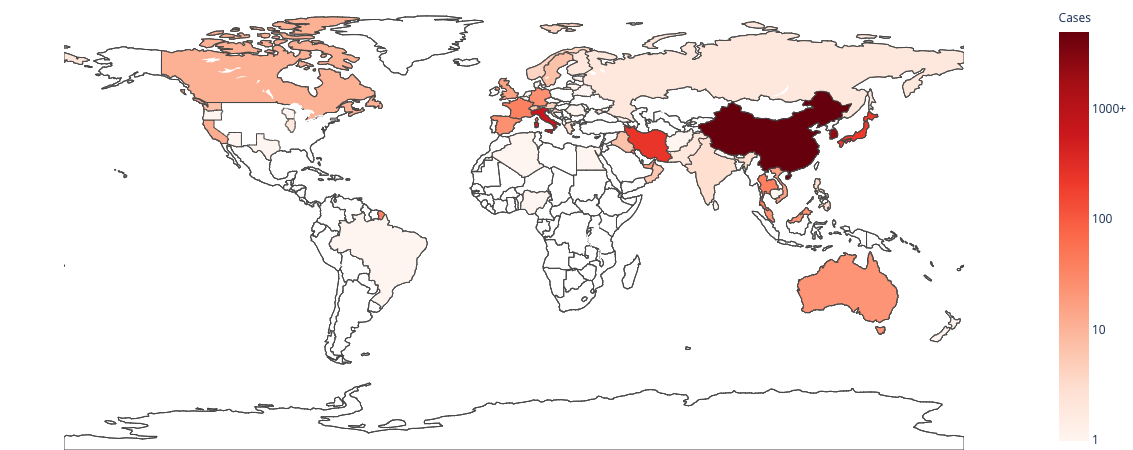

In [55]:
fig = go.Figure(data=[
    go.Choropleth(
        locationmode='country names',
        locations=world_all.region,
        z=np.log10(world_all.cases),
        colorscale='Reds',

        name='',
        text=df_text(world_all),
        hoverinfo='text',

        # Manually create log scale
        zauto=False, zmax=np.log10(zmax_prelog),
        colorbar=dict(
            tickvals=tickvals,
            ticktext=ticktext,
            title='Cases'
        ),    
    ),
    
    go.Choropleth(
        locationmode='USA-states',
        locations=us_states.region,
        z=np.log10(us_states.cases),
        colorscale='Reds',

        name='',
        text=df_text(us_states),
        hoverinfo='text',

        # Manually create log scale
        zauto=False, zmax=np.log10(zmax_prelog),
        showscale=False
    ),
])

fig.update_layout(
    geo=dict(
        showframe=False,
        landcolor='white',
        showcountries=True,
#         projection_type='natural earth'
    ),
    margin=dict(t=0, b=0, r=0, l=0),
)

---

In [56]:
mapbox_access_token = open('mapbox_token.txt').read()

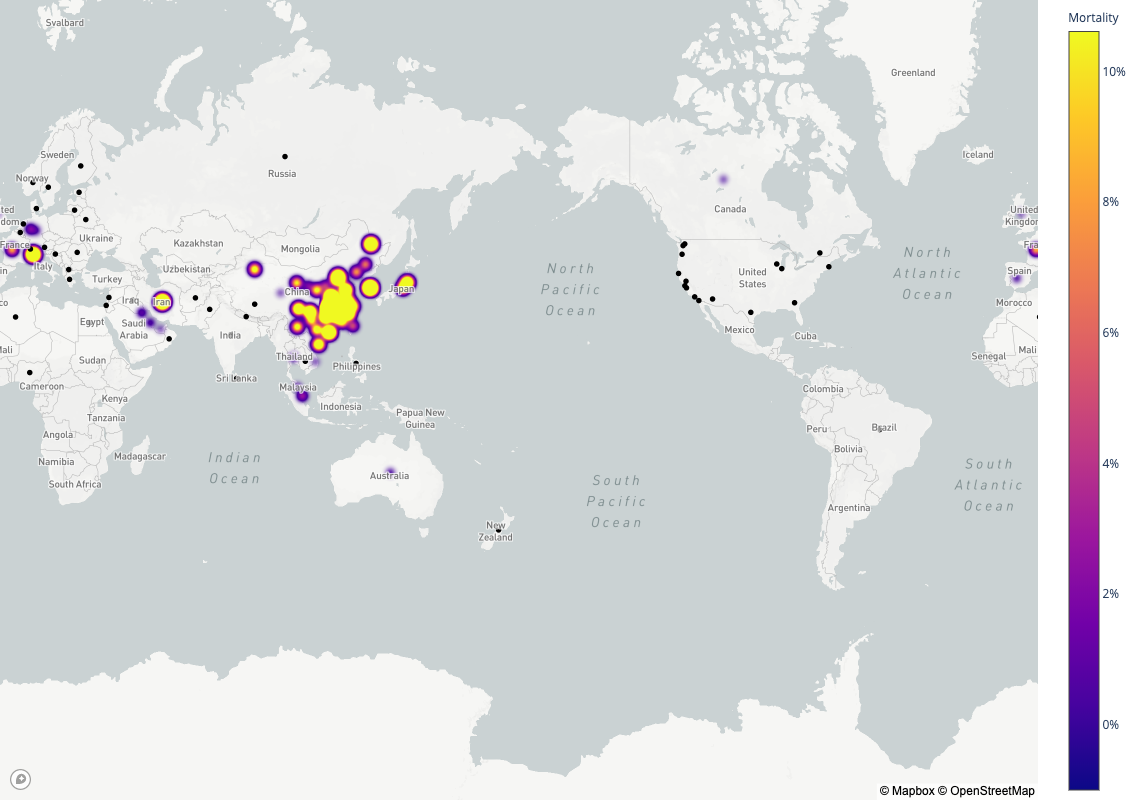

In [57]:
fig = go.Figure([
    go.Densitymapbox(
        lat=jittered.lat, 
        lon=jittered.lon, 
        z=jittered.z,
        
        name='',
        text=df_text(jittered),
        hovertemplate='%{text}',

        radius=10,
        colorscale='Plasma',

        zauto=False, zmin=-.01,
        
        colorbar=dict(
            title='Mortality',
            tickformat='%.%'
        )
    ),
    
    
    go.Scattermapbox(
        lat=low_cases.lat,
        lon=low_cases.lon,
        
        name='',
        text=df_text(low_cases),
        hoverinfo='text',

        marker=dict(
            color='black',
        )
    )
])

fig.update_layout(
    margin=dict(t=0, b=0, r=0, l=0),
    height=800,
    mapbox=dict(
        accesstoken=mapbox_access_token,

        style='light',  # carto-positron also works well and requires no key
        center_lon=180,
    )
)

At higher zoom levels, the intensity of the color indicates the (absolute) amount of deaths.